<a href="https://colab.research.google.com/github/Arseniy-Polyakov/machine_learning_course/blob/main/Task_1_Titanic_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [ ]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Шаг 2: загружаем данные с Титаника

In [ ]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [ ]:
df.info()
# NaN присутствует в столбцах Age, Cabin, Embarked, так как именно в этих столбцах значения Non-Null меньше 891, а значит среди значений присутствуют несколько NaN
# "Не жалко" будет выбросить строку Cabin, так как в ней больше всего NaN значений (687), строки Age и Embarked стоит оставить, так как там значений NaN на порядок меньше

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


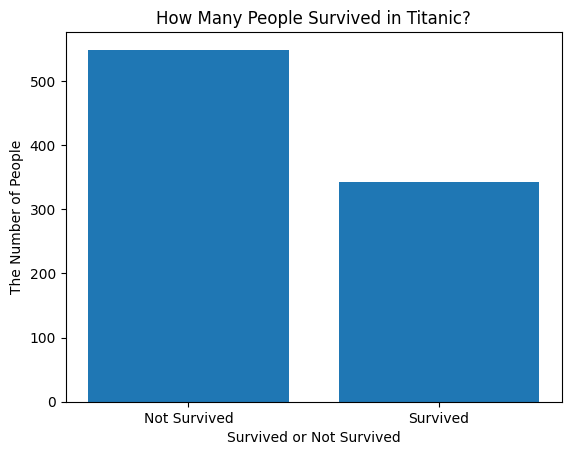

In [ ]:
groups = df.groupby("Survived").groups
zeros, ones = len(groups[0]), len(groups[1])
plt.bar(["Not Survived", "Survived"], height=[zeros, ones])
plt.title("How Many People Survived in Titanic?")
plt.xlabel("Survived or Not Survived")
plt.ylabel("The Number of People")
plt.show()
# По результатам можно сделать вывод, что людей, которые не выжили на Титанике, больше чем тех, кто выжил. Данные являются сбалансированными,
# так как нет существенного отличия между размерами двух выборок

In [ ]:
df.select_dtypes("object")
# Категориальные данные находятся в столбцах Name, Sex, Ticket, Cabin, Embarked (так как указан тип object, а не вариации int64 или float64)
# Категориальные данные необходимо обработать перед обучением модели, потому что модели могут работать только с числовыми значениями

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

1. Балансировка классов не требуется, так как размеры выборок приблизительно равны и не отличаются координально
2. Нужно удалить столбец Cabin, так как в нем на порядок меньше значений, чем во всех остальных
3. К числовому виду надо преобразовать столбцы, у которых type == "object", то есть: Name, Sex, Ticket, Cabin, Embarked

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [ ]:
del df["Cabin"]
del df["Name"]
del df["Ticket"]
del df["PassengerId"]
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [ ]:
# образец кодирования столбца 'Sex' с LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [ ]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира
df = pd.get_dummies(df, columns=['Embarked'])  # one-hot encoding
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [ ]:
df["Embarked_C"] = LabelEncoder().fit_transform(df["Embarked_C"])
df["Embarked_Q"] = LabelEncoder().fit_transform(df["Embarked_Q"])
df["Embarked_S"] = LabelEncoder().fit_transform(df["Embarked_S"])
df.head()
# LabelEncoder отличается от get_dummies тем, что LabelEncoder возвращает значения типа int (0 или 1), в отличие от метода get_dummies, который возвращает значения типа bool (True или False)
# Лучше всего в препроцессинге моделей использовать метод LabelEncoder, так как он возвращает числовые данные, с которыми модель сможет работать

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [ ]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
df['Age'] = imputer.fit_transform(df[['Age']])
df["Survived"] = imputer.fit_transform(df[["Survived"]])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    int64  
 8   Embarked_Q  891 non-null    int64  
 9   Embarked_S  891 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 69.7 KB


Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

1. Для работы с методом SimpleImputer есть следующие стратегии: использование среднего арифметического (mean), использование моды (самого частотного значения, most_frequent), медианы (median) и константы.
2. Для работы с категориальными данными подойдут мода и константа

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [ ]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Фича Alone для тех, кто путешествует один
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0.0,3,1,22.0,1,0,7.2500,0,0,1,2,0
1,1.0,1,0,38.0,1,0,71.2833,1,0,0,2,0
2,1.0,3,0,26.0,0,0,7.9250,0,0,1,1,1
3,1.0,1,0,35.0,1,0,53.1000,0,0,1,2,0
4,0.0,3,1,35.0,0,0,8.0500,0,0,1,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [ ]:
# В качестве новой фичи добавлю деление пассажиров Титаника по возрастным группам (дети от 0 до 12 лет, подростки от 13 от 17 лет, молодежь от 18 до 25 лет, взрослые от 26 лет до 55 лет, пожилые от 56 лет до 100 лет)
df["Generation"] = "Generation"
df.loc[(df["Age"] >= 0) & (df["Age"] <= 12), "Generation"] = "Child"
df.loc[(df["Age"] >= 13) & (df["Age"] <= 17), "Generation"] = "Teenager"
df.loc[(df["Age"] >= 18) & (df["Age"] <= 25), "Generation"] = "Young Adult"
df.loc[(df["Age"] >= 26) & (df["Age"] <= 55), "Generation"] = "Mature"
df.loc[(df["Age"] >= 56) & (df["Age"] <= 100), "Generation"] = "Old"

# Преобразуем категориальные данные в числовые
df["Generation"] = LabelEncoder().fit_transform(df["Generation"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Generation
0,0.0,3,1,22.0,1,0,7.2500,0,0,1,2,0,5
1,1.0,1,0,38.0,1,0,71.2833,1,0,0,2,0,2
2,1.0,3,0,26.0,0,0,7.9250,0,0,1,1,1,2
3,1.0,1,0,35.0,1,0,53.1000,0,0,1,2,0,2
4,0.0,3,1,35.0,0,0,8.0500,0,0,1,1,1,2


#### Шаг 4: обучение

Создаем пары `data - label`

In [ ]:
X = df.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = df['Survived'] # метки = только столбец Survived

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

In [ ]:
# Функция StandardScaler() позволяет преобразовать данные к виду, где 0 - это среднее значение, а std (стандартное отклонение) равняется 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

Логистическая регрессия - это алгоритм машинного обучения с учителем, который определяет принадлежность значения какому-либо категориальному классу. В отличии от линейной регрессии, где предсказывается числовое действительное значение, в логистической регрессии предсказывается класс (он будет выражен числовым значением типа int, однако по факту он будет обозначать категорию)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.7430167597765364
              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79       108
         1.0       0.68      0.66      0.67        71

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

Gaussian означает Гауссовский классификатор, это вариант алгоритма наивного Байеса, которые работает с непрерывными признаками, которые имеют Гауссовское распределение (нормальное распределение). StandardScaler в данном случае не нужен, так как нет необходимости приводить данные к нормальному виду (где 0 - это среднее арифметическое значение, а 1 - это стандартное отклонение), данные уже нормально распределены

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7374301675977654
              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78       108
         1.0       0.66      0.70      0.68        71

    accuracy                           0.74       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179



Мы молодцы! Отрисуем результат с помощью матрицы ошибок

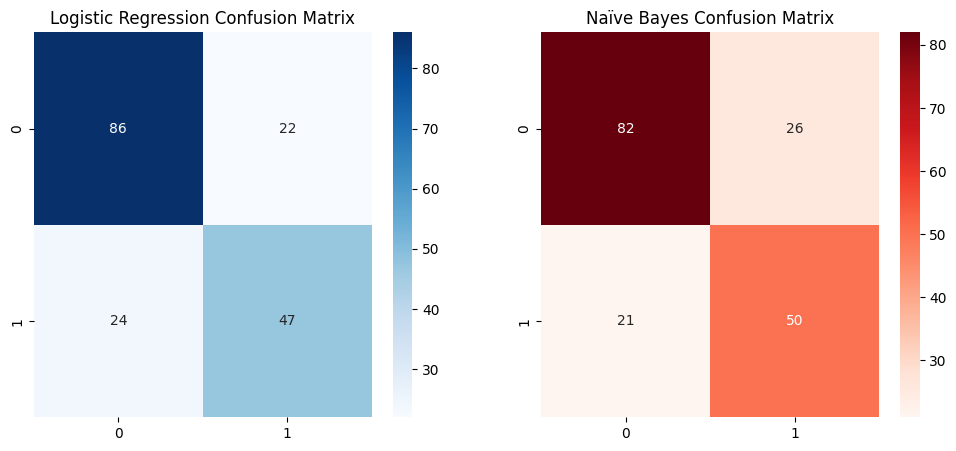

In [ ]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()

Описание и обучение модели. K-neighbours (метод k ближайших соседей)

K-neighbours - это алгоритм классического машинного обучения с учителем, который используется для классификации семплов в выборке. Строится на основе высчитывания меры центральной тенденции (моды в случае классификации и среднего арифметического в случае регрессии) между k расстояниями (косинусной близости, Манхэттенским расстоянием или расстоянием Евклида) на плоскости между каждым семплом из тестовой выборки и k семплами из обучающей выборки (параметр k является целочисленным значением, которое регулируется вручную и обозначает количество "соседей", с которыми будет высчитано расстояние с семплом из тестовой выборки)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classificator = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
classificator.fit(X_train, y_train)
y_pred_knn = classificator.predict(X_test)
report = classification_report(y_pred_knn, y_test)
print(report)


              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        87
         1.0       0.64      0.62      0.63        47

    accuracy                           0.75       134
   macro avg       0.72      0.72      0.72       134
weighted avg       0.74      0.75      0.74       134



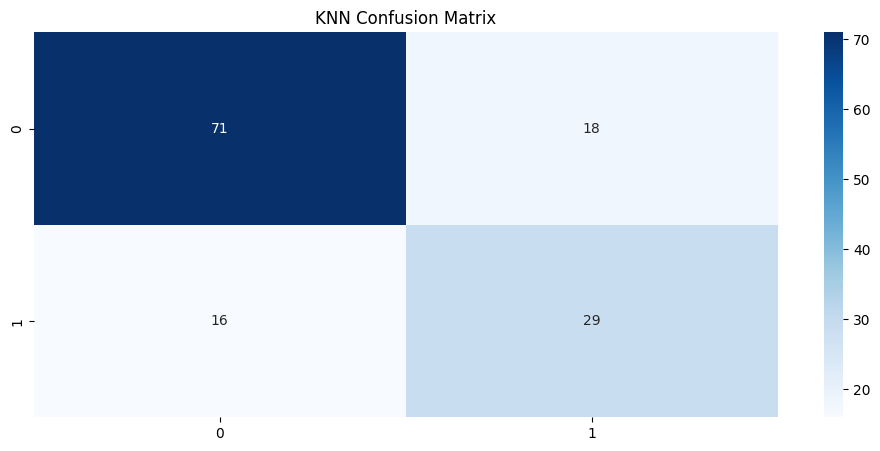

In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")
axes.set_title("KNN Confusion Matrix")

plt.show()

В данном алгоритме обучения я использовал технику feature engineering. В качестве новой фичи я определил поколение пассажиров на основе их возраста. Самостоятельно разбил на пять категорий (дети от 0 до 12 лет, подростки от 13 от 17 лет, молодежь от 18 до 25 лет, взрослые от 26 лет до 55 лет, пожилые от 56 лет до 100 лет) и использовал LabelEncoder для присвоения категориальным классам числовых меток.
Далее на основе новой фичи использовал алгоритм k ближайших соседей